In [1]:
import keras
from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline  

## 1. Let's import some data

In [3]:
dataset=pd.DataFrame()
dataset=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/AOMDeepLearningWorkshop/master/hourly_wages.csv')

In [4]:
dataset.head(10)

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0
5,13.07,1,13,9,28,0,0,0,0,0
6,4.45,0,10,27,43,0,0,1,0,0
7,19.47,0,12,9,27,0,0,0,0,0
8,13.28,0,16,11,33,0,1,0,1,0
9,8.75,0,12,9,27,0,0,0,0,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
wage_per_hour     534 non-null float64
union             534 non-null int64
education_yrs     534 non-null int64
experience_yrs    534 non-null int64
age               534 non-null int64
female            534 non-null int64
marr              534 non-null int64
south             534 non-null int64
manufacturing     534 non-null int64
construction      534 non-null int64
dtypes: float64(1), int64(9)
memory usage: 41.8 KB


In [6]:
firstcolumn=dataset.iloc[:,0]
## we need to extract just the values
target=firstcolumn.values

In [7]:
target[0:10]

array([  5.1 ,   4.95,   6.67,   4.  ,   7.5 ,  13.07,   4.45,  19.47,
        13.28,   8.75])

In [8]:
restofcolumns=dataset.iloc[:,1:]
## we need to extract just the values
predictors=restofcolumns.values

In [9]:
predictors[0:10]

array([[ 0,  8, 21, 35,  1,  1,  0,  1,  0],
       [ 0,  9, 42, 57,  1,  1,  0,  1,  0],
       [ 0, 12,  1, 19,  0,  0,  0,  1,  0],
       [ 0, 12,  4, 22,  0,  0,  0,  0,  0],
       [ 0, 12, 17, 35,  0,  1,  0,  0,  0],
       [ 1, 13,  9, 28,  0,  0,  0,  0,  0],
       [ 0, 10, 27, 43,  0,  0,  1,  0,  0],
       [ 0, 12,  9, 27,  0,  0,  0,  0,  0],
       [ 0, 16, 11, 33,  0,  1,  0,  1,  0],
       [ 0, 12,  9, 27,  0,  0,  0,  0,  0]])

In [10]:
numberofcolumns=predictors.shape[1]

In [11]:
numberofcolumns

9

## 2. Let's understand the data

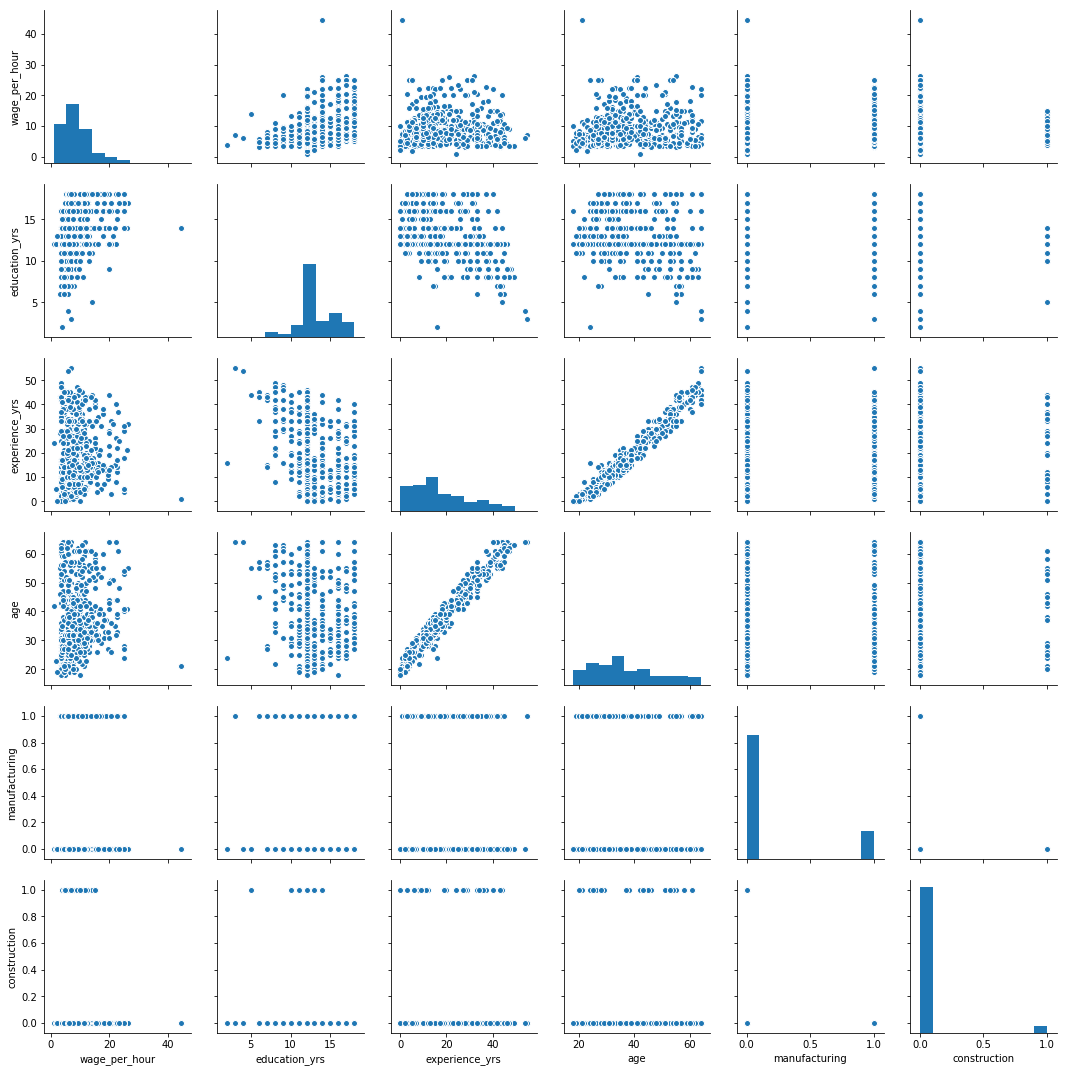

In [12]:
g = sns.pairplot(dataset[['wage_per_hour','education_yrs','experience_yrs','age','manufacturing','construction']])

In [13]:
correlation_matrix=dataset.corr()
correlation_matrix

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
wage_per_hour,1.000000,0.161766,0.381922,0.087060,0.176967,-0.205371,0.100579,-0.141031,0.053927,0.008314
union,0.161766,1.000000,-0.023886,0.117926,0.119466,-0.157027,0.093164,-0.086275,0.040185,0.086748
education_yrs,0.381922,-0.023886,1.000000,-0.352676,-0.150019,0.002031,-0.035522,-0.140143,-0.119605,-0.133006
experience_yrs,0.087060,0.117926,-0.352676,1.000000,0.977961,0.075230,0.270900,-0.007407,0.063746,0.084971
age,0.176967,0.119466,-0.150019,0.977961,1.000000,0.079179,0.278947,-0.038665,0.040926,0.060178
female,-0.205371,-0.157027,0.002031,0.075230,0.079179,1.000000,0.011225,-0.021264,-0.062097,-0.163457
marr,0.100579,0.093164,-0.035522,0.270900,0.278947,0.011225,1.000000,0.006523,0.031559,0.043169
south,-0.141031,-0.086275,-0.140143,-0.007407,-0.038665,-0.021264,0.006523,1.000000,-0.062747,0.059407
manufacturing,0.053927,0.040185,-0.119605,0.063746,0.040926,-0.062097,0.031559,-0.062747,1.000000,-0.103489
construction,0.008314,0.086748,-0.133006,0.084971,0.060178,-0.163457,0.043169,0.059407,-0.103489,1.000000


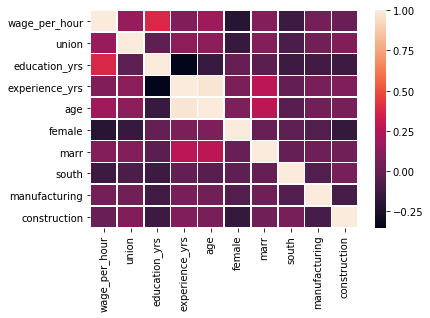

In [14]:
ax = sns.heatmap(correlation_matrix,linewidths=.5)

# 3. Let's specify the architecture of the model 

In [15]:
# Specify the model
model=Sequential()
model.add(Dense(10, activation='relu', input_shape = (numberofcolumns,)))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))

# 4. Let's compile our model

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae'])

# 5. Let's fit our model

In [17]:
# fit model
history = model.fit(predictors,target,verbose=2,epochs=10)

Epoch 1/10
 - 0s - loss: 40.6186 - mean_squared_error: 40.6186 - mean_absolute_error: 5.3621
Epoch 2/10
 - 0s - loss: 24.7410 - mean_squared_error: 24.7410 - mean_absolute_error: 3.8777
Epoch 3/10
 - 0s - loss: 22.7706 - mean_squared_error: 22.7706 - mean_absolute_error: 3.4758
Epoch 4/10
 - 0s - loss: 22.6698 - mean_squared_error: 22.6698 - mean_absolute_error: 3.4282
Epoch 5/10
 - 0s - loss: 22.4830 - mean_squared_error: 22.4830 - mean_absolute_error: 3.4634
Epoch 6/10
 - 0s - loss: 22.3457 - mean_squared_error: 22.3457 - mean_absolute_error: 3.4585
Epoch 7/10
 - 0s - loss: 22.2579 - mean_squared_error: 22.2579 - mean_absolute_error: 3.4553
Epoch 8/10
 - 0s - loss: 22.1833 - mean_squared_error: 22.1833 - mean_absolute_error: 3.4603
Epoch 9/10
 - 0s - loss: 22.0547 - mean_squared_error: 22.0547 - mean_absolute_error: 3.4453
Epoch 10/10
 - 0s - loss: 22.0323 - mean_squared_error: 22.0323 - mean_absolute_error: 3.4514


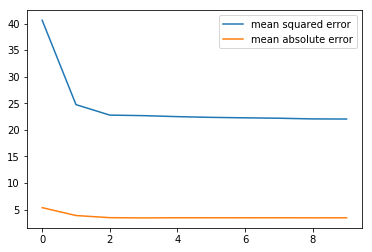

In [18]:

# plot metrics
pyplot.plot(history.history['mean_squared_error'],label='mean squared error')
pyplot.plot(history.history['mean_absolute_error'],label='mean absolute error')
pyplot.legend()
pyplot.show()

### You can try to improve the model by: (1) add more layers (deeper network), running more epochs, adding more neurons (wider network)...


## 5.1 Let's fit a wider model

Epoch 1/10
 - 0s - loss: 69.9423 - mean_squared_error: 69.9423 - mean_absolute_error: 6.3706
Epoch 2/10
 - 0s - loss: 29.2510 - mean_squared_error: 29.2510 - mean_absolute_error: 3.8335
Epoch 3/10
 - 0s - loss: 22.7209 - mean_squared_error: 22.7209 - mean_absolute_error: 3.5303
Epoch 4/10
 - 0s - loss: 22.2052 - mean_squared_error: 22.2052 - mean_absolute_error: 3.4379
Epoch 5/10
 - 0s - loss: 21.7000 - mean_squared_error: 21.7000 - mean_absolute_error: 3.4251
Epoch 6/10
 - 0s - loss: 21.4686 - mean_squared_error: 21.4686 - mean_absolute_error: 3.3954
Epoch 7/10
 - 0s - loss: 21.3115 - mean_squared_error: 21.3115 - mean_absolute_error: 3.3747
Epoch 8/10
 - 0s - loss: 21.3549 - mean_squared_error: 21.3549 - mean_absolute_error: 3.3954
Epoch 9/10
 - 0s - loss: 21.3036 - mean_squared_error: 21.3036 - mean_absolute_error: 3.3710
Epoch 10/10
 - 0s - loss: 20.9833 - mean_squared_error: 20.9833 - mean_absolute_error: 3.3294


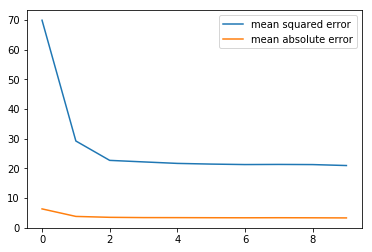

In [25]:
# Specify the model
widermodel=Sequential()
widermodel.add(Dense(100, activation='relu', input_shape = (numberofcolumns,)))
widermodel.add(Dense(50, activation='relu'))
widermodel.add(Dense(1))


# Compile the model
widermodel.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae'])


# train model
widerhistory = widermodel.fit(predictors,target,verbose=2,epochs=10)


# plot metrics
pyplot.plot(widerhistory.history['mean_squared_error'],label='mean squared error')
pyplot.plot(widerhistory.history['mean_absolute_error'],label='mean absolute error')
pyplot.legend()
pyplot.show()

## 5.2 Let's fit a deeper model

Epoch 1/10
 - 0s - loss: 21.4327 - mean_squared_error: 21.4327 - mean_absolute_error: 3.4019
Epoch 2/10
 - 0s - loss: 20.7170 - mean_squared_error: 20.7170 - mean_absolute_error: 3.3164
Epoch 3/10
 - 0s - loss: 20.7134 - mean_squared_error: 20.7134 - mean_absolute_error: 3.3103
Epoch 4/10
 - 0s - loss: 20.7106 - mean_squared_error: 20.7106 - mean_absolute_error: 3.3225
Epoch 5/10
 - 0s - loss: 20.6292 - mean_squared_error: 20.6292 - mean_absolute_error: 3.2954
Epoch 6/10
 - 0s - loss: 20.7732 - mean_squared_error: 20.7732 - mean_absolute_error: 3.3326
Epoch 7/10
 - 0s - loss: 20.5127 - mean_squared_error: 20.5127 - mean_absolute_error: 3.2764
Epoch 8/10
 - 0s - loss: 21.5162 - mean_squared_error: 21.5162 - mean_absolute_error: 3.3137
Epoch 9/10
 - 0s - loss: 20.5139 - mean_squared_error: 20.5139 - mean_absolute_error: 3.2520
Epoch 10/10
 - 0s - loss: 20.7846 - mean_squared_error: 20.7846 - mean_absolute_error: 3.2832


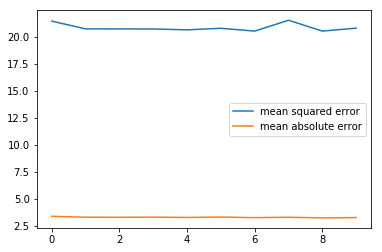

In [26]:
# Specify the model
deepermodel=Sequential()
deepermodel.add(Dense(100, activation='relu', input_shape = (numberofcolumns,)))
deepermodel.add(Dense(50, activation='relu'))
deepermodel.add(Dense(10, activation='relu'))
deepermodel.add(Dense(1))


# Compile the model
deepermodel.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae'])


# train model
deeperhistory = widermodel.fit(predictors,target,verbose=2,epochs=10)


# plot metrics
pyplot.plot(deeperhistory.history['mean_squared_error'],label='mean squared error')
pyplot.plot(deeperhistory.history['mean_absolute_error'],label='mean absolute error')
pyplot.legend()
pyplot.show()

### No significant improvement. In this case we need more data, that is usually the case with deep learning. It needs lots of data (thousands)

# 6. Let's predict using our first model

In [21]:
model.predict(np.array([[0,8,21,35,1,1,0,1,0]]))

array([[ 6.98419476]], dtype=float32)

In [22]:
model.predict(np.array([[0,12,4,22,0,0,0,0,0]]))


array([[ 7.19157505]], dtype=float32)